## Basics of EzGM
Created on: 26/08/2021

Updated on: 18/07/2022

Author: Volkan Ozsarac

Affiliation: University School for Advanced Studies IUSS Pavia

Earthquake Engineering PhD Candidate

email:  volkan.ozsarac@iusspavia.it

## Package installation on Google Colaboratory

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')
# Change directory to the location of notebook
%cd /content/drive/My Drive/Colab Notebooks/EzGM/notebooks 
# Install Openquake and EzGM
!pip install --upgrade pip
!pip install git+https://github.com/gem/oq-engine
!pip install git+https://github.com/volkanozsarac/EzGM.git

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/EzGM/notebooks
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/gem/oq-engine to /tmp/pip-req-build-jap_ox_x
  Running command git clone --filter=blob:none --quiet https://github.com/gem/oq-engine /tmp/pip-req-build-jap_ox_x
  Resolved https://github.com/gem/oq-engine to commit ff38caefb481b02684680719bac106c9aeb70eab
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/volkanozsarac/EzGM.git to /tmp/pip-req-build-nu2jqini
  Running command git clone --filter=blob:none --quiet https://github.com/volkanozsarac/EzGM.git /tmp/pip-req-

## Package contents
In order to understand what the contents of the package are, the user can use help(package name). EzGM has three different package contents. 

In [2]:
import EzGM
help(EzGM)

Help on package EzGM:

NAME
    EzGM

PACKAGE CONTENTS
    selection
    signal
    utility
    webdriverdownloader

FILE
    /usr/local/lib/python3.7/dist-packages/EzGM/__init__.py




## Description of the package contents
The package contents can be understood by making use of help(content). This will show what functions are inside the package.

### Description of the functions
Similarly, the description of a single function can be understood by making use of help(function). This will show the details of the function, description of the input parameters etc.

### Navigationg through folders
1. Navigation through the folders is possible in google-colab, and it is necessary in order to see and save output files to google drive or download them. First, open the notebook with Google Colaboratory.
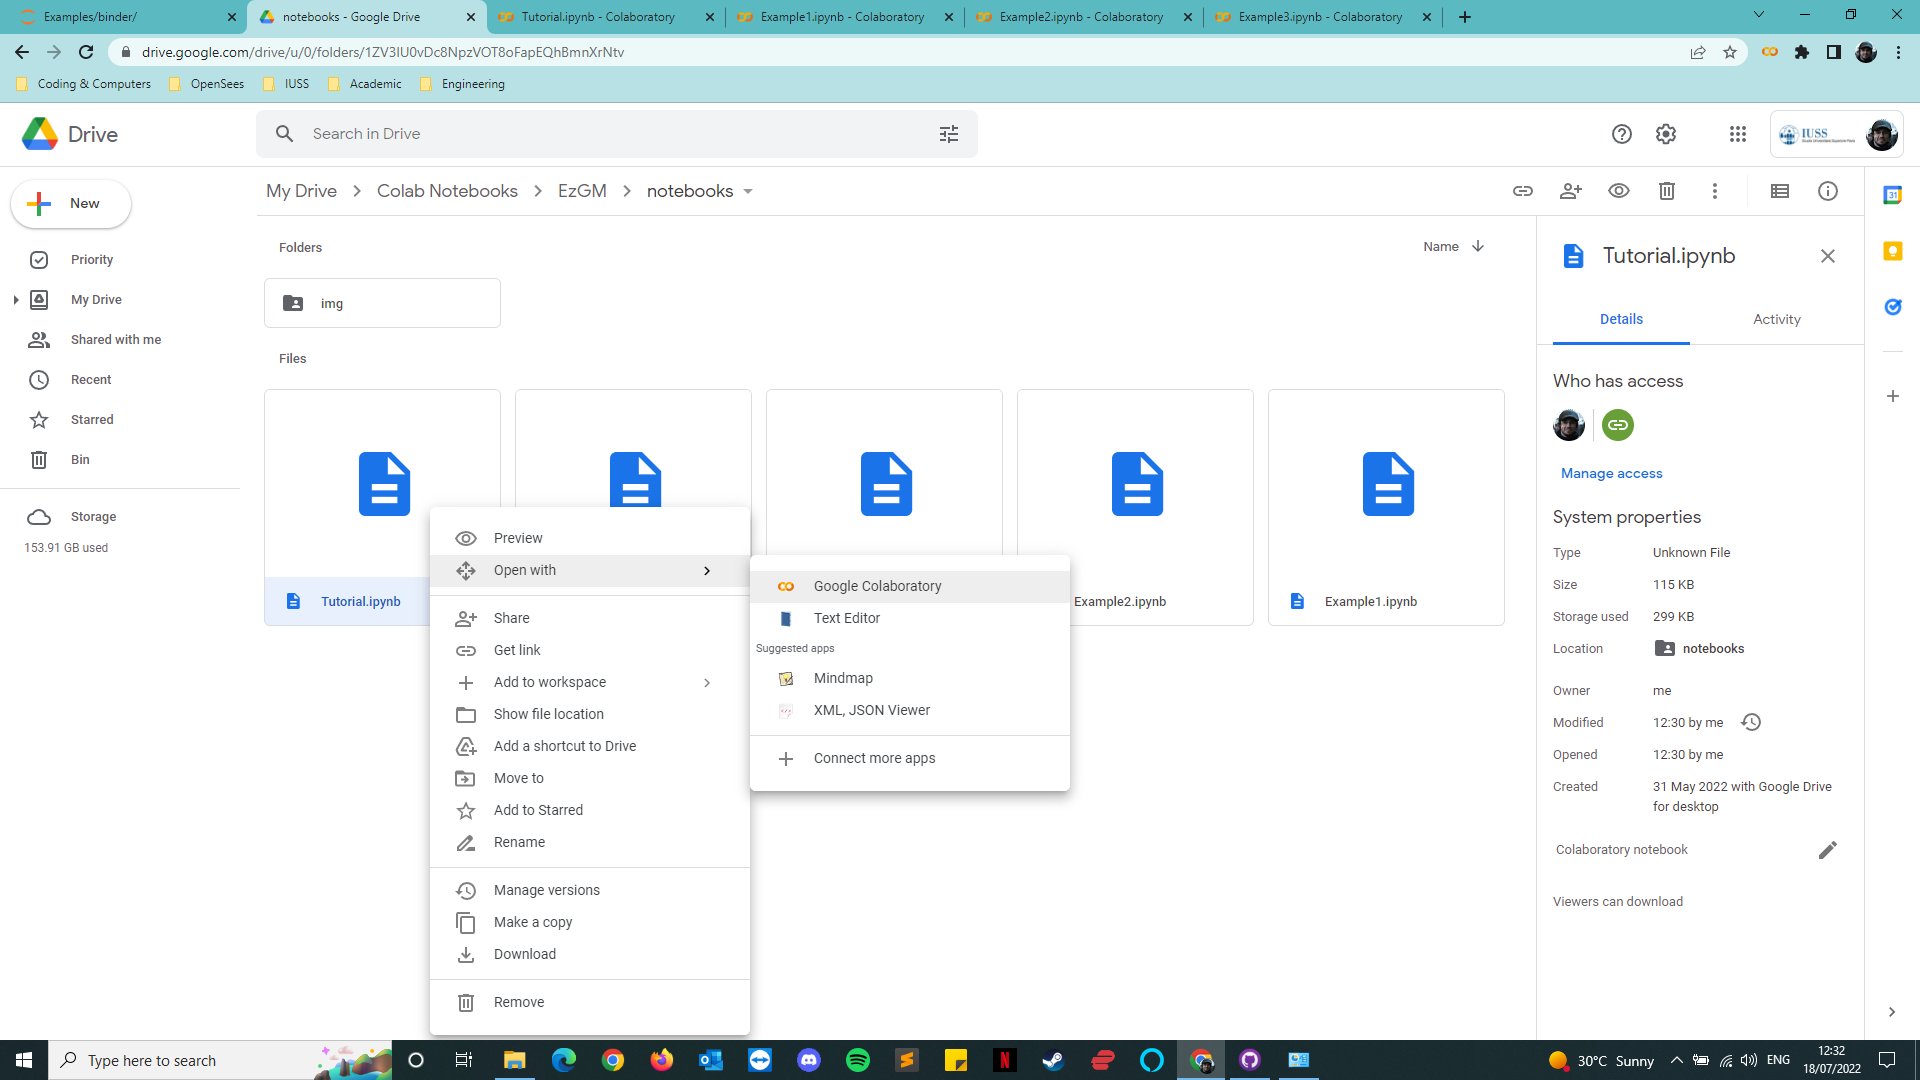

2. If the Google drive is not mounted. Then click on <font color='red'>Mount Drive</font>, then navigate to the google drive directory where your notebook is located. 
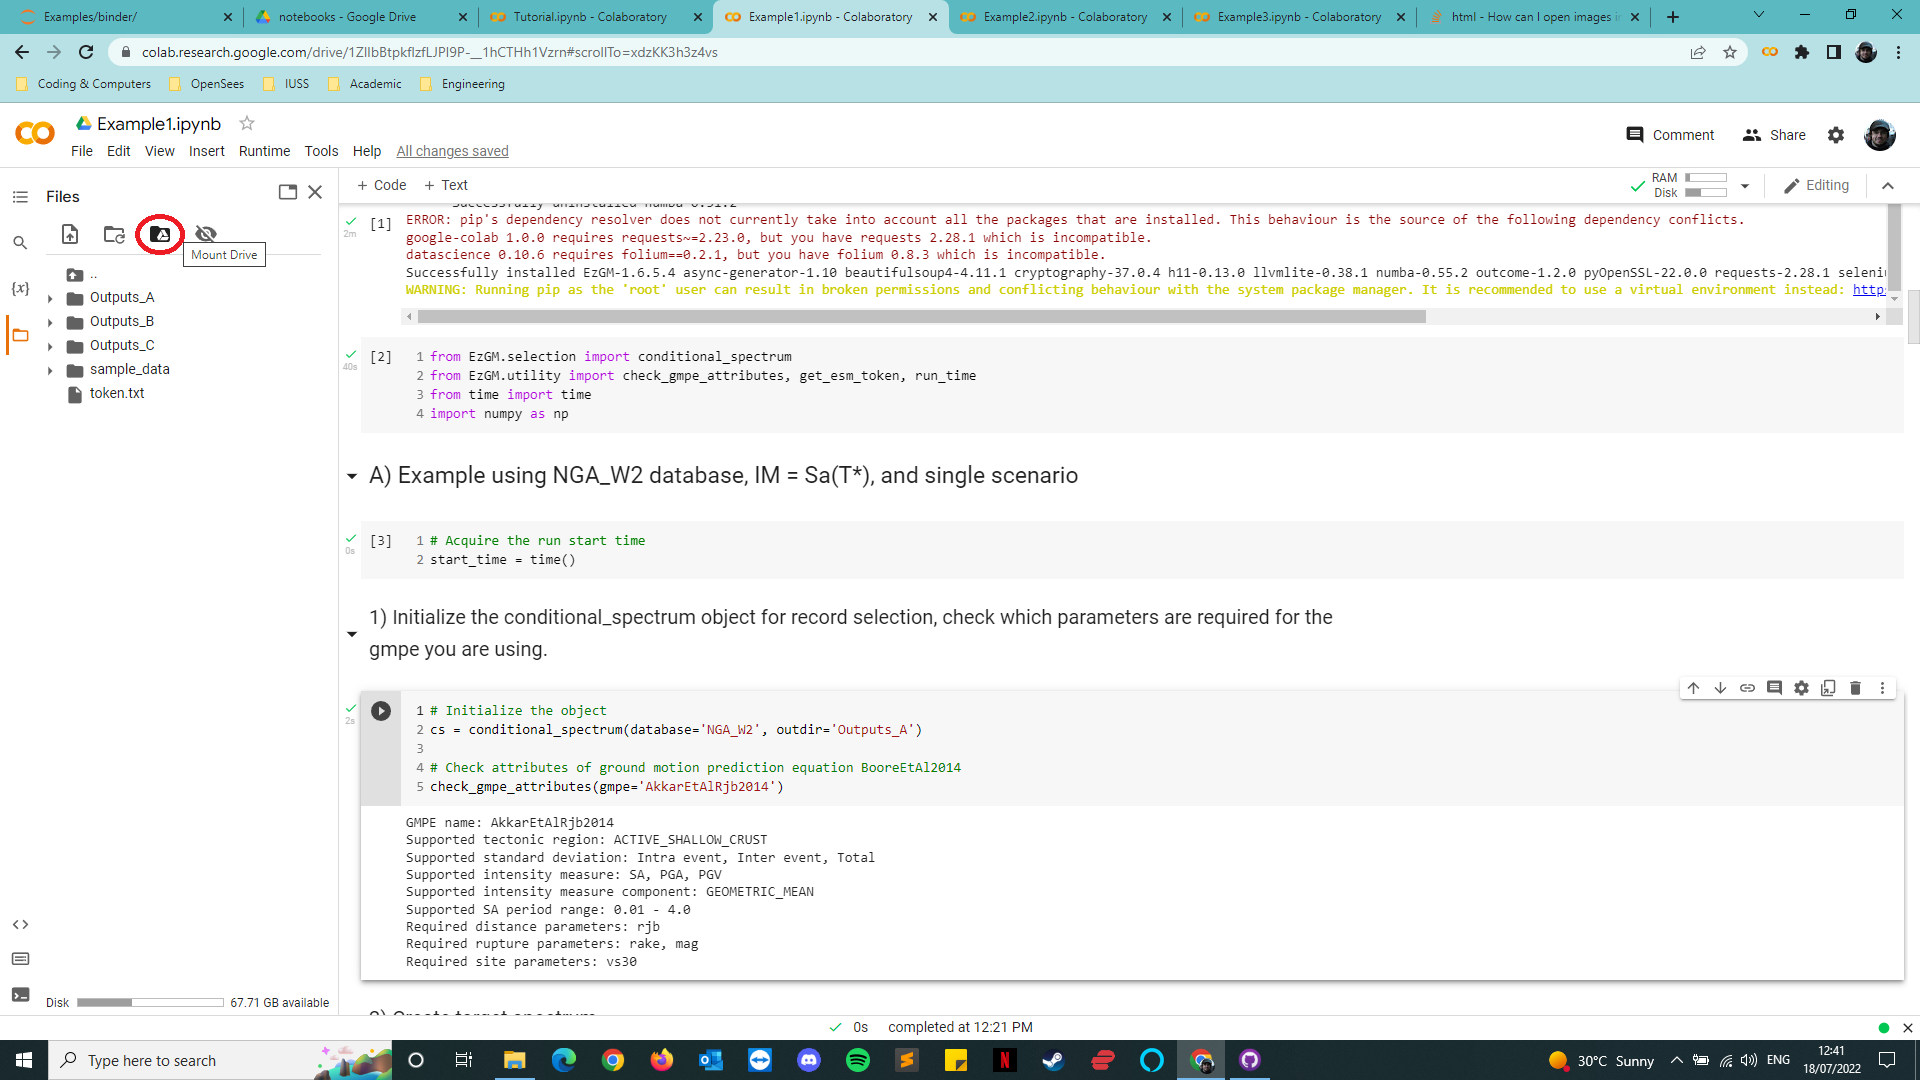
3. The output directory is defined by the user. If the user defined the name of output directory as <font color='red'>Outputs</font> all the information can be found within this folder:
    - Targeted spectrum: Targeted.pdf
    - Simulated and Targeted spectra: Simulated.pdf
    - Spectra of selected records and targeted spectrum: Selected.pdf
    - Dictionary which contains selection information: obj.pkl
    - Raw time histories: unscaled_records_2021_8_26_19_5_48_3_238_0.zip (unscaled_records_date_.zip)
    - Scaled and formatted time histories (in g): RSN1086_NORTHR_SYL360_SF_1.730.txt (RecordName_ScaleFactor.txt)
    - Scaled time history file names: GMR_names.txt (for selection in two horizontal directions these would be GMR_H1_names.txt   and GMR_H2_names.txt)
    - Time step of the selected time histories: GMR_dts.txt

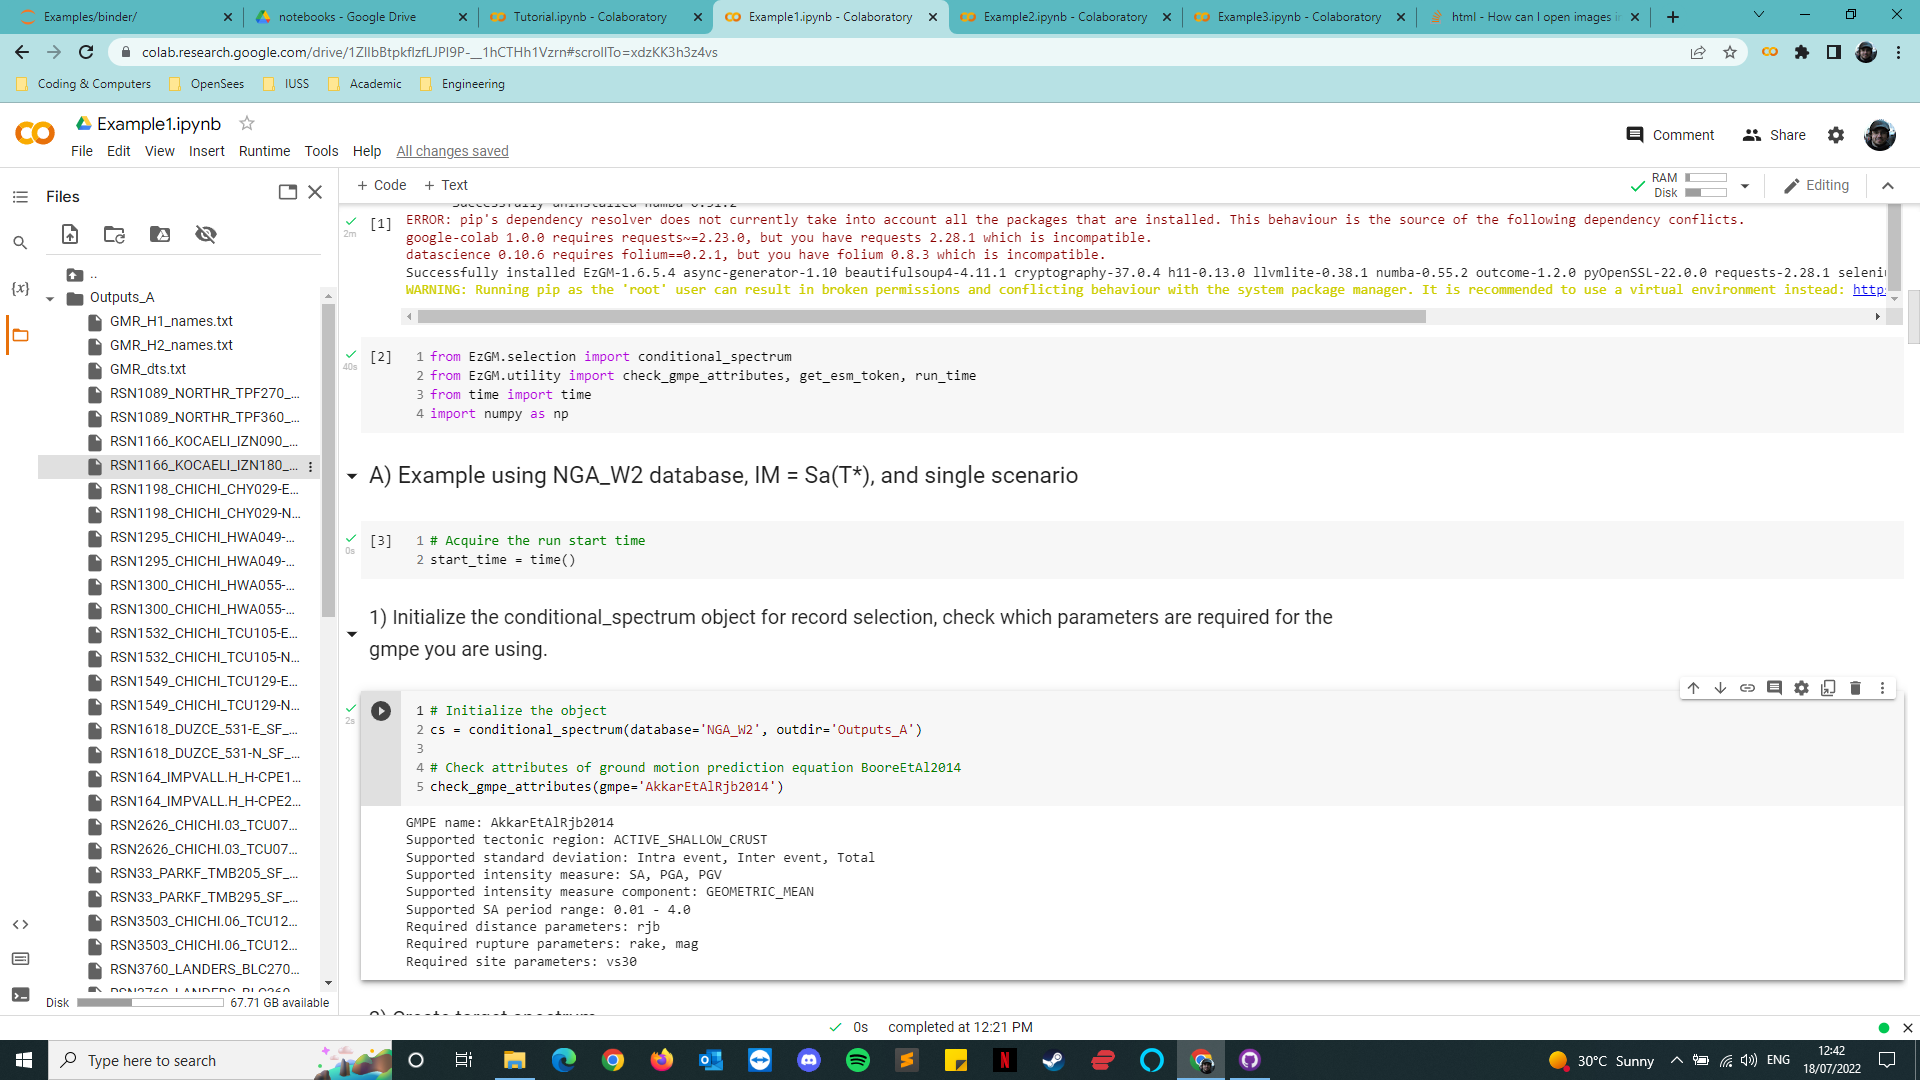

## 1) EzGM.selection
EzGM.selection has two subclasses which requires initialization: 
- conditional_spectrum: performs conditional spectrum based selection
- code_spectrum: performs building code based selection (TBEC 2018, ASCE 7-16, EC8 - Part 1)

Whichever selection option we use: we first create the associated object
- obj = EzGM.selection.conditional_spectrum(...)
- obj = EzGM.selection.code_spectrum(...)

### 1a) EzGM.selection.conditional_spectrum

In [3]:
help(EzGM.selection.conditional_spectrum.__init__) # obj = EzGM.Selection.conditional_spectrum(...)

Help on function __init__ in module EzGM.selection:

__init__(self, database='NGA_W2', outdir='Outputs')
    Details
    -------
    Loads the database and add spectral values for Tstar 
    if they are not present via interpolation.
    
    Parameters
    ----------
    database : str, optional
        Database to use: NGA_W2, ESM_2018
    The default is NGA_W2.
        outdir     : str, optional, the default is 'Outputs'.
        output directory to create.
    pInfo    : int, optional
        Flag to print required input for the gmpe which is going to be used. 
        (0: no, 1:yes)
        The default is 1.
        
    Returns
    -------
    None.



In [4]:
help(EzGM.selection.conditional_spectrum.create) # obj.create(...)

Help on function create in module EzGM.selection:

create(self, Tstar=0.5, gmpe='BooreEtAl2014', selection=1, Sa_def='RotD50', site_param={'vs30': 520}, rup_param={'rake': [0.0, 45.0], 'mag': [7.2, 6.5]}, dist_param={'rjb': [20, 5]}, Hcont=[0.6, 0.4], T_Tgt_range=[0.01, 4], im_Tstar=1.0, epsilon=None, cond=1, useVar=1, corr_func='baker_jayaram')
    Details
    -------
    Creates the target spectrum (conditional or unconditional).
    
    Notes
    -----
    See https://docs.openquake.org/oq-engine/master/openquake.hazardlib.gsim.html
    in order to check required input parameters for the ground motion models.
    e.g. rupture parameters (rup_param), site parameters (site_param), distance parameters (dist_param)
    rupture parameters 'fhw', 'azimuth', 'upper_sd' and 'lower_sd' are used to derive some gmm parameters
    in accordance with Kaklamanos et al. 2011 within conditional_spectrum._set_contexts method.
    
    References
    ----------
    Baker JW. Conditional Mean Spectru

In [5]:
help(EzGM.selection.conditional_spectrum.select) # obj.select(...)

Help on function select in module EzGM.selection:

select(self, nGM=30, isScaled=1, maxScale=4, Mw_lim=None, Vs30_lim=None, Rjb_lim=None, fault_lim=None, nTrials=20, weights=[1, 2, 0.3], seedValue=0, nLoop=2, penalty=0, tol=10)
    Details
    -------
    Perform the ground motion selection.
    
    References
    ----------
    Jayaram, N., Lin, T., and Baker, J. W. (2011). 
    A computationally efficient ground-motion selection algorithm for 
    matching a target response spectrum mean and variance.
    Earthquake Spectra, 27(3), 797-815.
    
    Parameters
    ----------
    nGM : int, optional, the default is 30.
        Number of ground motions to be selected.
    isScaled : int, optional, the default is 1.
        0 not to allow use of amplitude scaling for spectral matching.
        1 to allow use of amplitude scaling for spectral matching.
    maxScale : float, optional, the default is 4.
        The maximum allowable scale factor
    Mw_lim : list, optional, the default is

In [6]:
help(EzGM.selection.conditional_spectrum.ngaw2_download) # obj.ngaw2_download(...)

Help on function ngaw2_download in module EzGM.selection:

ngaw2_download(self, username, pwd, sleeptime=2, browser='chrome')
    Details
    -------
    This function has been created as a web automation tool in order to
    download unscaled record time histories from NGA-West2 Database
    (https://ngawest2.berkeley.edu/) by Record Sequence Numbers (RSNs).
    
    Notes
    -----
    Either of google-chrome or mozilla-firefox should have been installed priorly.
    
    Parameters
    ----------
    username     : str
        Account username (e-mail),  e.g. 'username@mail.com'.
    pwd          : str
        Account password, e.g. 'password!12345'.
    sleeptime    : int, default is 3
        Time (sec) spent between each browser operation. This can be increased or decreased depending on the internet speed.
    browser       : str, default is 'chrome'
        The browser to use for download purposes. Valid entries are: 'chrome' or 'firefox'.
    
    Returns
    -------
    None



In [7]:
help(EzGM.selection.conditional_spectrum.write) # obj.write(...)

Help on function write in module EzGM.selection:

write(self, obj=0, recs=1, recs_f='')
    Details
    -------
    Writes the object as pickle, selected and scaled records as .txt files.
    
    Parameters
    ----------
    obj : int, optional
        flag to write the object into the pickle file.
        The default is 0.
    recs : int, optional
        flag to write the selected and scaled time histories.
        The default is 1.
    recs_f : str, optional
        This is option could be used if the user already has all the
        records in database. This is the folder path which contains
        "database.zip" file. The records must be placed inside
        recs_f/database.zip/database/
        The default is ''.
    
    Notes
    -----
    0: no, 1: yes
    
    Returns
    -------
    None.



In [8]:
help(EzGM.selection.conditional_spectrum.plot) # obj.plot(...)

Help on function plot in module EzGM.selection:

plot(self, tgt=0, sim=0, rec=1, save=0, show=1)
    Details
    -------
    Plots the spectra of selected and simulated records,
    and/or target spectrum.
    
    Parameters
    ----------
    tgt    : int, optional for conditional_spectrum
        Flag to plot target spectrum.
        The default is 1.
    sim    : int, optional for conditional_spectrum
        Flag to plot simulated response spectra vs. target spectrum.
        The default is 0.
    rec    : int, optional for conditional_spectrum
        Flag to plot Selected response spectra of selected records
        vs. target spectrum.
        The default is 1.
    save   : int, optional for all selection options
        Flag to save plotted figures in pdf format.
        The default is 0.
    show  : int, optional for all selection options
        Flag to show figures
        The default is 0.
    
    Notes
    -----
    0: no, 1: yes
    
    Returns
    -------
    None.



### 1b) EzGM.selection.code_spectrum

In [9]:
help(EzGM.selection.code_spectrum.__init__)  # obj = EzGM.selection.code_spectrum(...)

Help on function __init__ in module EzGM.selection:

__init__(self, database='NGA_W2', outdir='Outputs', target_path=None, nGM=11, selection=1, Mw_lim=None, Vs30_lim=None, Rjb_lim=None, fault_lim=None, opt=1, maxScale=2, RecPerEvent=3)
    Details
    -------
    Loads the record database to use, creates output folder, sets selection criteria.
    
    Parameters
    ----------
    database : str, optional
        Database to use: NGA_W2, ESM_2018
        The default is NGA_W2.
    outdir : str, optional
        Output directory
        The default is 'Outputs'
    target_path = str, optional, the default is None.
        Path for used defined target spectrum.
    nGM : int, optional, the default is 11.
        Number of records to be selected. 
    selection : int, optional, the default is 1.
        Number of ground motion components to select. 
    Mw_lim : list, optional, the default is None.
        The limiting values on magnitude. 
    Vs30_lim : list, optional, the default is N

In [10]:
help(EzGM.selection.code_spectrum.tbec2018)  # obj.tbec2018(...)

Help on function tbec2018 in module EzGM.selection:

tbec2018(self, Lat=41.0582, Long=29.00951, DD=2, SiteClass='ZC', Tp=1)
    Details
    -------
    Selects the suitable ground motion set in accordance with TBEC 2018. 
    If user did not define any target spectrum, the design spectrum defined by the code is going to be used. 
    The latter requires the definition of site parameters
    
    
    References
    ----------
    TBEC. (2018). Turkish building earthquake code.
    
    Notes
    -----
    Rule 1: Mean of selected records should remain above the lower bound target spectra.
        For selection = 1: Sa_rec = (Sa_1 or Sa_2) - lower bound = 1.0 * SaTarget(0.2Tp-1.5Tp) 
        For Selection = 2: Sa_rec = (Sa_1**2+Sa_2**2)**0.5 - lower bound = 1.3 * SaTarget(0.2Tp-1.5Tp) 
    
    Rule 2: 
        No more than 3 records can be selected from the same event! In other words,
        rec_eqID cannot be the same for more than 3 of the selected records.      
    
    Rule 3: 
 

In [11]:
help(EzGM.selection.code_spectrum.asce7_16)  # obj.asce7_16(...)

Help on function asce7_16 in module EzGM.selection:

asce7_16(self, Lat=34, Long=-118, RiskCat='II', SiteClass='C', T1_small=1, T1_big=1, Tlower=None, Tupper=None)
    Details
    -------
    Selects the suitable ground motion set in accordance with ASCE 7-16. 
    If user did not define any target spectrum, the MCE_R response spectrum defined by the code is going to be used. 
    The latter requires the definition of site parameters.
    
    
    References
    ----------
    American Society of Civil Engineers. (2017, June). Minimum design loads and associated criteria 
    for buildings and other structures. American Society of Civil Engineers.
    
    Notes
    -----
    Rule 1: Mean of selected records should remain above the lower bound target spectra.
        For selection = 1: Sa_rec = (Sa_1 or Sa_2) - lower bound = 0.9 * Sa_MCEr(Tlower-Tupper) 
        For Selection = 2: Sa_rec = RotD100 - lower bound = 0.9 * Sa_MCEr(Tlower-Tupper)     
        Tlower >= 0.2 * T1_small
     

In [12]:
help(EzGM.selection.code_spectrum.ec8_part1)  # obj.ec8_part1(...)

Help on function ec8_part1 in module EzGM.selection:

ec8_part1(self, ag=0.2, xi=0.05, ImpClass='II', Type='Type1', SiteClass='C', Tp=1)
    Details
    -------
    Select the suitable ground motion set in accordance with EC8 - PART 1.
    If user did not define any target spectrum, the design spectrum defined by the code is going to be used. 
    The latter requires the definition of site parameters
    
    References
    ----------
    CEN. Eurocode 8: Design of Structures for Earthquake Resistance -  Part 1: General Rules, Seismic Actions and Rules 
    for Buildings (EN 1998-1:2004). Brussels, Belgium: 2004.
    
    Notes
    -----
    Section 3.2.3.1.
    
    Rule 1 (a): 
        At least 3 records (or pairs) must be selected.
    
    Rule 2 (b): 
        mean(PGA_rec) >= PGA_target
        Here we assume SA(T[0])=PGA, where T[0] is 0.01 for both record databases.
        Not a bad assumption since it is very close to PGA.
    
    Rule 3 (c): Mean of selected records should r

## 2) EzGM.signal
Methods inside EzGM.signal can be used to process signal obtained from ground motion records.

In [13]:
help(EzGM.signal.baseline_correction)

Help on function baseline_correction in module EzGM.signal:

baseline_correction(values, dt, polynomial_type)
    Details
    -------
    This function performs base line correction on the given signal.
    
    Notes
    -----
    Applicable for Constant, Linear, Quadratic and Cubic polynomial functions.
        
    References
    ----------
    Kramer, Steven L. 1996. Geotechnical Earthquake Engineering. Prentice Hall.
        
    Parameters
    ----------
    values: numpy.array
        signal values.
    dt: float          
        sampling interval.
    polynomial_type: str
        type of baseline correction 'Constant', 'Linear', 'Quadratic', 'Cubic'.
        
    Returns
    -------
    values_corrected: numpy.array
        corrected values



In [14]:
help(EzGM.signal.butterworth_filter)

Help on function butterworth_filter in module EzGM.signal:

butterworth_filter(values, dt, cut_off=25, filter_order=4, filter_type='lowpass', alpha_window=0.05)
    Details
    -------
    This function performs infinite impulse response (IIR) filtering.
    It uses butterworth digital and analog filter design.
    Before performing the filtering, it applies tukey window on the signal, and adds zero pads with signal length
    to the start and end.
    
    References
    ----------
    Kramer, Steven L. 1996. Geotechnical Earthquake Engineering, Prentice Hall.
        
    Parameters
    ----------
    values: numpy.array
        Input signal.
    dt: float
        time-step.
    cut_off: float, tuple, list, optional (The default is 25)
        Cut off frequencies for the filter (Hz).
        For lowpass and highpass filters this parameters is a float e.g. 25 or 0.1
        For bandpass or bandstop filters this parameter is a tuple or list e.g. (0.1, 25)
    filter_type: str, optional

In [15]:
help(EzGM.signal.get_parameters)

Help on function get_parameters in module EzGM.signal:

get_parameters(Ag, dt, T, xi)
    Details
    -------
    This function computes various ground motion parameters or intensity measures for a given record.
        
    References
    ---------- 
    Kramer, Steven L. 1996. Geotechnical Earthquake Engineering, Prentice Hall
    Chopra, A.K. 2012. Dynamics of Structures: Theory and 
    Applications to Earthquake Engineering, Prentice Hall.
        
    Parameters
    ----------
    Ag: numpy.array    
        Acceleration values [m/s2].
    dt: float
        Time step [sec]
    T:  float, numpy.array.
        Considered period array e.g. 0 sec, 0.1 sec ... 4 sec.
    xi: float
        Damping ratio, e.g. 0.05 for 5%.
        
    Returns
    -------
    param: dictionary
        Contains the following intensity measures:
        PSa: numpy.array
            Elastic pseudo-acceleration response spectrum [m/s2].
        PSv: numpy.array
            Elastic pseudo-velocity response s

In [16]:
help(EzGM.signal.sdof_ltha)

Help on function sdof_ltha in module EzGM.signal:

sdof_ltha(Ag, dt, T, xi, m=1)
    Details
    -------
    This function carries out linear time history analysis for SDOF system
    It currently uses Newmark Beta Method.
    
    References
    ---------- 
    Chopra, A.K. 2012. Dynamics of Structures: Theory and 
    Applications to Earthquake Engineering, Prentice Hall.
    N. M. Newmark, “A Method of Computation for Structural Dynamics,”
    ASCE Journal of the Engineering Mechanics Division, Vol. 85, 1959, pp. 67-94.
    
    Notes
    -----
    * Linear Acceleration Method: Gamma = 1/2, Beta = 1/6
    * Average Acceleration Method: Gamma = 1/2, Beta = 1/4
    * Average acceleration method is unconditionally stable,
      whereas linear acceleration method is stable only if dt/Tn <= 0.55
      Linear acceleration method is preferable due to its accuracy.
    
    Parameters
    ----------
    Ag: numpy.array    
        Acceleration values.
    dt: float
        Time step [sec]
 

In [17]:
help(EzGM.signal.RotDxx_spectrum)

Help on function RotDxx_spectrum in module EzGM.signal:

RotDxx_spectrum(Ag1, Ag2, dt, T, xi, xx)
    Details
    -------
    This function computes RotDxx spectrum. It currently uses Newmark Beta Method.
    
    References
    ---------- 
    Boore, D. M. (2006). Orientation-Independent Measures of Ground Motion. 
    Bulletin of the Seismological Society of America, 96(4A), 1502–1511.
    Boore, D. M. (2010). Orientation-Independent, Nongeometric-Mean Measures 
    of Seismic Intensity from Two Horizontal Components of Motion. 
    Bulletin of the Seismological Society of America, 100(4), 1830–1835.
    
    Notes
    -----
    * Linear Acceleration Method: Gamma = 1/2, Beta = 1/6
    * Average Acceleration Method: Gamma = 1/2, Beta = 1/4
    * Average acceleration method is unconditionally stable,
      whereas linear acceleration method is stable only if dt/Tn <= 0.55
      Linear acceleration method is preferable due to its accuracy.
        
    Parameters
    ----------
    Ag1

## 3) EzGM.utility
EzGM.utility contains methods to post-process probabilistic seismic hazard analysis (PSHA) results obtained from OpenQuake Engine. These are:

In [18]:
help(EzGM.utility.hazard_curve)

Help on function hazard_curve in module EzGM.utility:

hazard_curve(poes, path_hazard_results, output_dir='Post_Outputs', filename='hazard_curve-mean')
    Details
    -------
    This script will save hazard curves and  iml's corresponding to the desired poes
    as .txt files, and the plot the hazard curves in the same figure.
    
    Parameters
    ----------
    poes : list
        Probabilities of exceedance in tw years for which im levels will be obtained.
    path_hazard_results: str
        Path to the hazard results.
    output_dir: str, optional
        Save outputs to a pickle file.
    filename : str, optional
        filename to process.
    
    Returns
    -------
    None.



In [19]:
help(EzGM.utility.disagg_MR)

Help on function disagg_MR in module EzGM.utility:

disagg_MR(Mbin, dbin, path_disagg_results, output_dir='Post_Outputs', n_rows=1, filename='Mag_Dist')
    Details
    -------
    This script will save disaggregation plots including M and R.
    
    Parameters
    ----------
    Mbin : int, float
        magnitude bin used in disaggregation.
    dbin : int, float
        distance bin used in disaggregation.
    path_disagg_results: str
        Path to the disaggregation results.
    output_dir: str, optional
        Save outputs to a pickle file.
    n_rows : int, optional
        total number of rows for subplots.
    filename : str, optional
        filename to process.
    
    Returns
    -------
    None.



In [20]:
help(EzGM.utility.disagg_MReps)

Help on function disagg_MReps in module EzGM.utility:

disagg_MReps(Mbin, dbin, path_disagg_results, output_dir='Post_Outputs', n_rows=1, filename='Mag_Dist_Eps')
    Details
    -------
    This script will save disaggregation plots
    including M and R.
    
    Parameters
    ----------
    Mbin : int, float
        magnitude bin used in disaggregation.
    dbin : int, float
        distance bin used in disaggregation.
    path_disagg_results: str
        Path to the hazard results
    output_dir: str, optional
        Save outputs to a pickle file
    n_rows : int, optional
        total number of rows for subplots.
    filename : str, optional
        filename to process.
    
    Returns
    -------
    None.



Moreover, some of the methods inside EzGM.utility are used in EzGM.selection. Yet, these methods can be used by the user indepedently. These are:

In [21]:
help(EzGM.utility.run_time)

Help on function run_time in module EzGM.utility:

run_time(start_time)
    Details
    -------
    Prints the time passed between startTime and FinishTime (now)
    in hours, minutes, seconds. startTime is a global variable.
    
    Parameters
    ----------
    start_time : int
        The initial time obtained via time().
    
    Returns
    -------
    None.



In [22]:
help(EzGM.utility.create_dir)

Help on function create_dir in module EzGM.utility:

create_dir(dir_path)
    Details
    -------
    Creates a clean directory by deleting it if it exists.
    
    Parameters
    ----------
    dir_path : str
        name of directory to create.
    
    None.



In [23]:
help(EzGM.utility.ContentFromZip)

Help on function ContentFromZip in module EzGM.utility:

ContentFromZip(paths, zipName)
    Details
    -------
    This function reads the contents of all selected records
    from the zipfile in which the records are located
    
    Parameters
    ----------
    paths : list
        Containing file list which are going to be read from the zipfile.
    zipName    : str
        Path to the zip file where file lists defined in "paths" are located.
    
    Returns
    -------
    contents   : dictionary
        Containing raw contents of the files which are read from the zipfile.



In [24]:
help(EzGM.utility.ReadNGA)

Help on function ReadNGA in module EzGM.utility:

ReadNGA(inFilename=None, content=None, outFilename=None)
    Details
    -------
    This function process acceleration history for NGA data file (.AT2 format).
    
    Parameters
    ----------
    inFilename : str, optional
        Location and name of the input file.
        The default is None
    content    : str, optional
        Raw content of the .AT2 file.
        The default is None
    outFilename : str, optional
        location and name of the output file.
        The default is None.
    
    Notes
    -----
    At least one of the two variables must be defined: inFilename, content.
    
    Returns
    -------
    dt   : float
        time interval of recorded points.
    npts : int
        number of points in ground motion record file.
    desc : str
        Description of the earthquake (e.g., name, year, etc).
    t    : numpy.array (n x 1)
        time array, same length with npts.
    acc  : numpy.array (n x 1)
    

In [25]:
help(EzGM.utility.ReadESM)

Help on function ReadESM in module EzGM.utility:

ReadESM(inFilename=None, content=None, outFilename=None)
    Details
    -------
    This function process acceleration history for ESM data file.
    
    Parameters
    ----------
    inFilename : str, optional
        Location and name of the input file.
        The default is None
    content    : str, optional
        Raw content of the ESM record file.
        The default is None
    outFilename : str, optional
        location and name of the output file.
        The default is None.
    
    Returns
    -------
    dt   : float
        time interval of recorded points.
    npts : int
        number of points in ground motion record file.
    desc : str
        Description of the earthquake (e.g., name, year, etc).
    time : numpy.array (n x 1)
        time array, same length with npts.
    acc  : numpy.array (n x 1)
        acceleration array, same length with time unit
        usually in (g) unless stated as other.



In [26]:
help(EzGM.utility.get_esm_token)

Help on function get_esm_token in module EzGM.utility:

get_esm_token(username, pwd)
    Details
    -------
    This function retrieves ESM database token.
    
    Notes
    -------
    Data must be obtained using any program supporting the HTTP-POST method, e.g. CURL.
    see: https://esm-db.eu/esmws/generate-signed-message/1/query-options.html
    Credentials must have been retrieved from https://esm-db.eu/#/home.
    
    Parameters
    ----------
    username     : str
        Account username (e-mail),  e.g. 'username@mail.com'.
    pwd          : str
        Account password, e.g. 'password!12345'.
    
    Returns
    -------
    None.



In [27]:
help(EzGM.utility.get_available_gmpes)

Help on function get_available_gmpes in module EzGM.utility:

get_available_gmpes()
    Details
    -------
    Retrieves available ground motion prediction equations (gmpe) in OpenQuake.
    
    Parameters
    ----------
    None.
    
    Returns
    -------
    gmpes : dict
        Dictionary which contains available gmpes in openquake.



In [28]:
help(EzGM.utility.check_gmpe_attributes)

Help on function check_gmpe_attributes in module EzGM.utility:

check_gmpe_attributes(gmpe)
    Details
    -------
    Checks the attributes for ground motion prediction equation (gmpe).
    
    Parameters
    ----------
    gmpe : str
        gmpe name for which attributes going to be checked
    
    Returns
    -------
    None.



In [29]:
help(EzGM.utility.SiteParam_tbec2018)

Help on function SiteParam_tbec2018 in module EzGM.utility:

SiteParam_tbec2018(Lat, Long, DD, SiteClass)
    Details
    -------
    This method retrieves the design response spectrum parameters for the given site according to TBEC2018.
    
    References
    ----------
    TBEC. (2018). Turkish building earthquake code.
    
    Notes
    -----
    
    Parameters
    ----------
    Lat: float
        Site latitude
    Long: float
        Site longitude
    DD:  int
        Earthquake ground motion intensity level (1,2,3,4)
    SiteClass: str
        Site soil class ('ZA','ZB','ZC','ZD','ZE')
    
    Returns
    -------
    PGA: float
        Peak ground acceleration
    SDS: float
        Short period (0.2 sec) spectral acceleration coefficient
    SD1: float
        Spectral acceleration coefficient at period 1.0
    TL: float
        Period value for long-period transition



In [30]:
help(EzGM.utility.Sae_tbec2018)

Help on function Sae_tbec2018 in module EzGM.utility:

Sae_tbec2018(T, PGA, SDS, SD1, TL)
    Details
    -------
    This method calculates the design response spectrum according to TBEC2018.
    
    References
    ----------
    TBEC. (2018). Turkish building earthquake code.
    
    Notes
    -----
    
    Parameters
    ----------
    T:  numpy.array
        period array in which target spectrum is calculated
    PGA: float
        Peak ground acceleration
    SDS: float
        Short period (0.2 sec) spectral acceleration coefficient
    SD1: float
        Spectral acceleration coefficient at period 1.0
    TL: float
        Period value for long-period transition
    
    Returns
    -------
    Sae: numpy.array
        Elastic acceleration response spectrum



In [31]:
help(EzGM.utility.SiteParam_asce7_16)

Help on function SiteParam_asce7_16 in module EzGM.utility:

SiteParam_asce7_16(Lat, Long, RiskCat, SiteClass)
    Details
    -------
    This method makes use of API developed by USGS to get spectra (ASCE7-16) info in US.
    It retrieves the design response spectrum parameters for the given site.
    
    References
    ----------
    https://earthquake.usgs.gov/ws/designmaps/asce7-16.html
    American Society of Civil Engineers. (2017, June). Minimum design loads and associated criteria
    for buildings and other structures. American Society of Civil Engineers.
    
    Notes
    -----
    
    Parameters
    ----------
    Lat: float
        Site latitude
    Long: float
        Site longitude
    RiskCat:  str
        Risk category for structure ('I','II','III','IV')
    SiteClass: str
        Site soil class ('A','B','C','D','E')
    
    Returns
    -------
    SDS: float
        Short period (0.2 sec) spectral acceleration coefficient
    SD1: float
        Spectral accelerat

In [32]:
help(EzGM.utility.Sae_asce7_16)

Help on function Sae_asce7_16 in module EzGM.utility:

Sae_asce7_16(T, SDS, SD1, TL)
    Details
    -------
    This method determines the design response spectrum based on ASCE 7-16.
    
    References
    ----------
    American Society of Civil Engineers. (2017, June). Minimum design loads and associated criteria
    for buildings and other structures. American Society of Civil Engineers.
    
    Notes
    -----
    
    Parameters
    ----------
    SDS: float
        Numeric seismic design value (0.2 sec)
    SD1: float
        Numeric seismic design value (1.0 sec)
    TL: float
        Long-period transition period
    
    
    Returns
    -------
    Sae: numpy.array
        Elastic acceleration response spectrum



In [33]:
help(EzGM.utility.Sae_ec8_part1)

Help on function Sae_ec8_part1 in module EzGM.utility:

Sae_ec8_part1(ag, xi, T, ImpClass, Type, SiteClass)
    Details
    -------
    Calculates the design response spectrum according to EN 1998-1:2004
    
    References
    ----------
    CEN. Eurocode 8: Design of Structures for Earthquake Resistance -  Part 1: General Rules,
    Seismic Actions and Rules for Buildings (EN 1998-1:2004). Brussels, Belgium: 2004.
    
    Notes
    -----
    
    Parameters
    ----------
    ag: float
        Peak ground acceleration
    xi: float
        Damping ratio
    T: list or numpy.array
        Period array to get Sa values
    ImpClass: str
        Importance class ('I','II','III','IV')
    Type: str
        Type of spectrum ('Type1','Type2')
    SiteClass: str
        Site Soil Class ('A','B','C','D','E')
    
    Returns
    -------
    Sae: numpy.array
        Elastic acceleration response spectrum



In [34]:
help(EzGM.utility.parse_sa_lt_to_avgsa)

Help on function parse_sa_lt_to_avgsa in module EzGM.utility:

parse_sa_lt_to_avgsa(input_lt_file, output_lt_file, periods, correlation)
    Details
    -------
    Parses the ordinary SA ground motion logic tree to an AvgSA equivalent
    
    Parameters
    ----------
    input_lt_file : str
        Input GMPE logic tree for SA, e.g. 'gmmLT.xml'
    output_lt_file : str
        The output GMPE LT file, e.g. 'gmmLT_AvgSA.xml'
    periods : list
        List of periods for the AvgSA calculation
        e.g. periods = [[0.4,0.5,0.6,0.7,0.8], [1.1,1.2,1.3,1.4,1.5]]
    correlation: str
        String for one of the supported correlation models (e.g. 'akkar', 'baker_jayaram')
    
    Returns
    -------
    None.



## 4) EzGM.webdriverdownloader
EzGM.webdriverdownloader contains methods to download webdrivers for chrome and firefox. 

In [35]:
help(EzGM.webdriverdownloader)

Help on module EzGM.webdriverdownloader in EzGM:

NAME
    EzGM.webdriverdownloader - Module for managing the download of Selenium webdriver binaries.

DESCRIPTION
    This code is released under the MIT license.
    It is retrieved from: https://github.com/leonidessaguisagjr/webdriverdownloader
    Modified by Volkan Ozsarac on 21/04/2022

CLASSES
    builtins.object
        WebDriverDownloaderBase
            ChromeDriverDownloader
            GeckoDriverDownloader
    
    class ChromeDriverDownloader(WebDriverDownloaderBase)
     |  ChromeDriverDownloader(download_root=None, link_path=None, os_name=None)
     |  
     |  Class for downloading the Google Chrome WebDriver.
     |  
     |  Method resolution order:
     |      ChromeDriverDownloader
     |      WebDriverDownloaderBase
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  get_download_path(self, version='latest')
     |      Method for getting the target download path for a web driver bina